# TP Data Science
## Objetivo general:
Analizar cómo interactúan consumo, estacionalidad, clima y produccion de gas natural por provincias de Argentina desde 2019 hasta 2024, para entender el comportamiento del suministro energético.




---



# 1. Importación de librerías

In [ ]:
# Importando librerias para analizar y visualizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carga y modificación de los datos

## Temperatura mensual por provincia.
Se cargó un CSV previamente modificado en sheets que contiene los promedios mensuales de las temperaturas provinciales desde el año 2019 al 2023. 
* 1. El tratamiento previo en sheet consistió en tomar los registros de temperaturas diarios por provincia. A los cuales se le eliminaron las celdas nulas, se agruparon los registros y se calculó el promedio, dando como resultado un nuevo csv (Clima_prom).
* 2. Resulta importante destacar que por cuestión de dificultades en el acceso al registro histórico de temperaturas de Santiago del Estero, se creó una serie de registros sintéticos con IA, utilizando como prompt "A partir de las temperaturas registradas diariamente en la provincia de Santiago del Estero desde Enero de 2019 hasta Diciembre de 2023(incluido), calcular el promedio, y así generar un dataset que contenga la temperatura promedio mensual (en grados centrigrados)"
En el siguiente fragmento de código se transformó la columna 'date'


In [ ]:
#Cargo el dataframe de clima_prom
df_clima_prov = pd.read_csv('/content/drive/MyDrive/DATA SC - Clima_prom - DATA SC - Clima_prom.csv')
#Convertir la columna 'date' a formato de fecha
df_clima_prov['indice_tiempo'] = pd.to_datetime(df_clima_prov['indice_tiempo'])

NameError: name 'pd' is not defined

In [ ]:
#Se visualizarán las últimas 5 filas de manera que, se pueda confirmar que efectivamente se encuentra hasta el año 2024, abarcando los ultimos 5 meses del año
df_clima_prov.tail (5)

NameError: name 'df_clima_prov' is not defined

In [ ]:
#Información del dataframe
df_clima_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   indice_tiempo             60 non-null     datetime64[ns]
 1   temp_buenos_aires         60 non-null     float64       
 2   temp_catamarca            60 non-null     float64       
 3   temp_chaco                60 non-null     float64       
 4   temp_chubut               60 non-null     float64       
 5   temp_cordoba              60 non-null     float64       
 6   temp_corrientes           60 non-null     float64       
 7   temp_entre_rios           60 non-null     float64       
 8   temp_formosa              60 non-null     float64       
 9   temp_jujuy                60 non-null     float64       
 10  temp_la_pampa             60 non-null     float64       
 11  temp_la_rioja             60 non-null     float64       
 12  temp_mendoza            

In [ ]:
#Descripción estadística de las columnas numéricas
df_clima_prov.describe()

,indice_tiempo,temp_buenos_aires,temp_catamarca,temp_chaco,temp_chubut,temp_cordoba,temp_corrientes,temp_entre_rios,temp_formosa,temp_jujuy,...,temp_neuquen,temp_rio_negro,temp_salta,temp_san_juan,temp_san_luis,temp_santa_cruz,temp_santa_fe,temp_santiago_del_estero,temp_tierra_del_fuego,temp_tucuman
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2021-06-16 06:24:00,17.736500,19.601333,20.001500,11.237333,18.213333,20.195167,18.909167,21.077333,17.156500,...,12.876833,11.937000,18.11400,19.238833,16.684333,6.635000,19.626000,23.093333,6.502833,18.640167
min,2019-01-01 00:00:00,9.380000,8.270000,10.630000,3.600000,8.610000,10.980000,9.770000,11.660000,9.390000,...,5.050000,3.390000,9.29000,8.650000,7.510000,-0.660000,9.870000,12.800000,-0.100000,9.490000
25%,2020-03-24 06:00:00,14.157500,13.945000,15.190000,7.930000,12.587500,15.162500,14.070000,16.252500,13.250000,...,8.862500,7.620000,13.71750,13.380000,11.360000,2.897500,14.680000,18.875000,3.520000,13.480000
50%,2021-06-16 00:00:00,18.115000,20.795000,21.080000,11.370000,19.410000,21.130000,20.070000,21.895000,17.885000,...,13.590000,12.805000,19.36000,19.975000,17.755000,7.520000,20.600000,23.950000,7.800000,19.715000
75%,2022-09-08 12:00:00,21.660000,24.987500,24.662500,15.110000,23.230000,24.862500,23.680000,25.680000,20.690000,...,16.840000,16.140000,22.30000,24.672500,21.505000,9.940000,24.310000,27.825000,9.227500,23.510000
max,2023-12-01 00:00:00,24.630000,28.520000,27.530000,17.350000,26.430000,27.680000,26.540000,28.710000,23.820000,...,19.820000,18.730000,25.54000,29.080000,25.070000,12.160000,27.290000,31.900000,11.230000,26.750000
std,NaN,4.502746,5.809601,4.993309,4.075793,5.485430,4.957831,5.081277,4.972727,3.985839,...,4.407974,4.478135,4.60644,6.017513,5.232527,3.776945,5.150242,5.395286,3.243190,5.253627


### **Funciones**
Se creó una función para agregar una nueva columna llamada 'Estación'. Permite determinar la estación según el número del mes. Tomando trimestres para asignarlas, por ejemplo, si el mes fuera 12, 1 o 2 se le asigna la estación Verano.

In [ ]:
#Crear una función para asignar la estación de acuerdo al datetime en la columna indice_tiempo
def asignar_estacion(fecha):
  mes=fecha.month
  if mes in [12, 1, 2]:
    return 'Verano'
  elif mes in [3, 4, 5]:
    return 'Otoño'
  elif fecha.month in [6, 7, 8]:
    return 'Invierno'
  else:
    return 'Primavera'


### **Nueva Columna**: Estación y GDC (Grados/Dia de Calefacción)

*Grados Día de Calefacción (GDC): Se usan para calcular el consumo de gas para calefacción en los meses fríos, siendo un tipo de medida que cuantifica la demanda de energía para calentar un edificio, relacionando las temperaturas exteriores con una temperatura de confort deseada.*

In [ ]:
#Generación de la columna 'Estación' usando la nueva función creada
df_clima_prov['estacion'] = df_clima_prov['indice_tiempo'].apply(asignar_estacion)

In [ ]:
#Verificación que se haya aplicado correctamente la función en la nueva columna 'estacion'
print(df_clima_prov['estacion'].value_counts())

estacion
Verano       15
Otoño        15
Invierno     15
Primavera    15
Name: count, dtype: int64


In [ ]:
# Listado de las columnas de temperaturas por provincia para manipulación posterior
columnas_provincias = ['temp_buenos_aires', 'temp_catamarca', 'temp_chaco', 'temp_chubut', 'temp_cordoba',
                       'temp_corrientes', 'temp_entre_rios', 'temp_formosa', 'temp_jujuy', 'temp_la_pampa',
                       'temp_la_rioja', 'temp_mendoza', 'temp_misiones', 'temp_neuquen', 'temp_rio_negro',
                       'temp_salta', 'temp_san_juan', 'temp_san_luis', 'temp_santa_cruz',
                       'temp_santiago_del_estero', 'temp_tierra_del_fuego',
                       'temp_tucuman', 'temp_santa_fe', 'temp_tucuman']

In [ ]:
"""Se calculan como la suma de las diferencias entre una temperatura base de calefacción y
la temperatura media diaria exterior, considerando únicamente los días
en que la temperatura media es inferior a la temperatura base. La temperatura base es 18"""
# Crear una columna de Grados-Dia Calefaccion(GDC) para cada provincia usando for
for prov in columnas_provincias:
    # Nuevas columnas llamads 'gdc_+provincia
    nombre_gdc = 'gdc_' + prov

In [ ]:
"""Se va a calcular el GDC y se guardara en la nueva columna (El GDC de base de Argentina es de 18)
Será 18 - temperatura promedio"""
# columnas de temperatura
temp_cols = [c for c in df_clima_prov.columns if c.startswith('temp_')]

# base de confort (18°C) y 30 días en promedio
base = 18
dias_mes = 30

"""Usando .clip(lower=0) quita el valor negativo a GD/C,
puesto que al hacer más de 18°C no se considera necesario el uso calefacción"""
for col in temp_cols:
    prov = col.replace('temp_', '')
    df_clima_prov[f'gdc_{prov}'] = (base - df_clima_prov[col]).clip(lower=0) * dias_mes


In [ ]:
#Visualización del dataframe con las nuevas columnas de GDC para cada provincia
df_clima_prov

,indice_tiempo,temp_buenos_aires,temp_catamarca,temp_chaco,temp_chubut,temp_cordoba,temp_corrientes,temp_entre_rios,temp_formosa,temp_jujuy,...,gdc_neuquen,gdc_rio_negro,gdc_salta,gdc_san_juan,gdc_san_luis,gdc_santa_cruz,gdc_santa_fe,gdc_santiago_del_estero,gdc_tierra_del_fuego,gdc_tucuman
0,2019-01-01,24.22,26.68,27.05,16.79,26.43,27.53,26.54,28.71,22.06,...,0.0,14.7,0.0,0.0,0.0,203.1,0.0,0.0,301.2,0.0
1,2019-02-01,23.51,25.96,26.82,16.71,25.26,26.45,25.79,27.97,21.01,...,0.0,39.0,0.0,0.0,0.0,211.2,0.0,0.0,273.3,0.0
2,2019-03-01,22.04,22.75,23.86,15.11,21.61,23.11,22.56,24.58,19.22,...,28.2,42.3,0.0,0.0,0.0,235.5,0.0,0.0,289.5,0.0
3,2019-04-01,17.88,19.98,20.59,11.13,18.06,19.82,18.88,21.43,17.15,...,168.3,202.8,0.0,0.0,69.6,364.2,0.0,0.0,346.8,0.0
4,2019-05-01,14.54,13.90,15.64,8.32,12.59,15.22,14.40,16.89,14.70,...,286.8,311.4,107.4,129.6,214.2,485.1,86.4,51.0,463.8,111.9
5,2019-06-01,10.42,8.27,10.63,5.20,8.61,11.66,10.13,12.33,12.42,...,378.9,417.3,215.4,280.5,314.7,513.0,211.5,156.0,522.0,234.9
6,2019-07-01,10.29,11.20,11.96,4.39,9.77,12.55,11.75,12.54,12.63,...,388.5,438.3,192.0,203.4,272.4,558.9,195.0,132.0,543.0,214.2
7,2019-08-01,14.24,14.99,16.29,7.00,14.15,17.20,16.03,17.16,14.47,...,287.7,311.4,104.1,98.7,156.6,481.2,57.6,21.0,463.8,93.6
8,2019-09-01,15.65,19.34,19.46,9.76,17.65,19.32,18.23,20.35,16.53,...,215.4,239.4,2.7,0.0,79.8,403.8,0.0,0.0,393.6,0.0
9,2019-10-01,17.90,20.93,22.04,11.53,20.72,22.04,21.00,22.79,18.61,...,108.3,123.6,0.0,0.0,0.0,317.4,0.0,0.0,305.4,0.0




---



## Consumo de gas
El csv cargado brinda información a nivel mensual sobre el consumo de gas natural a nivel nacional, residencial, por distribuidora y entre otros. En el tratamiento a realizar se incluye la transformación de la columna indice_tiempo a date, eliminación de columnas que no serán utilizadas, agrupación de columnas y luego se estableció como parámetro el periodo 2019-2024

In [ ]:
#Consumo a nivel nacional, residencial, industrias, comercial, entes, centrales, y distribuidoras
df_prodcons= pd.read_csv('/content/drive/MyDrive/exportaciones-actividad-saldocomercial-rangos-exportacion-empresa-exportadora-mensual.csv')

In [ ]:
#Información del dataframe
df_prodcons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   indice_tiempo                  353 non-null    object 
 1   produccion_gas_natural         353 non-null    float64
 2   total                          352 non-null    float64
 3   residencial                    352 non-null    float64
 4   comercial                      352 non-null    float64
 5   entes_oficiales                352 non-null    float64
 6   industria                      352 non-null    float64
 7   centrales_electricas           352 non-null    float64
 8   sdb                            352 non-null    float64
 9   gnc                            352 non-null    float64
 10  metrogas                       352 non-null    float64
 11  gas_natural_fenosa             352 non-null    float64
 12  distrib_gas_del_centro_ecogas  352 non-null    flo

In [ ]:
#visualización del dataframe. Se observa que el dataset contiene datos desde 1996 hasta 2024
df_prodcons.head(15)

,indice_tiempo,produccion_gas_natural,total,residencial,comercial,entes_oficiales,industria,centrales_electricas,sdb,gnc,metrogas,gas_natural_fenosa,distrib_gas_del_centro_ecogas,distrib_gas_cuyana_ecogas,litoral_gas,gasnea,redengas,gasnor,camuzzi_gas_pampeana,camuzzi_gas_del_sur
0,1996-01-01,2504.980000,1887.181,211.996,42.534,8.783,722.624,803.185,12.203,85.856,496.604,150.440,90.166,99.731,180.638,0.0,1.343,135.642,387.077,345.540
1,1996-02-01,2325.370000,1731.663,216.713,43.851,9.499,714.512,656.703,14.482,75.903,398.279,168.594,84.350,95.175,168.693,0.0,1.439,137.112,350.583,327.438
2,1996-03-01,2735.070000,2018.787,225.193,56.130,16.476,791.862,832.398,15.871,80.857,503.750,177.370,92.186,111.341,184.743,0.0,1.587,140.103,424.864,382.843
3,1996-04-01,2584.150000,1935.116,351.159,73.160,17.779,773.839,612.963,18.109,88.107,458.635,200.311,98.590,93.188,192.930,0.0,1.591,125.108,350.836,413.927
4,1996-05-01,3006.480000,2304.545,572.829,75.569,23.653,769.583,748.281,22.857,91.773,562.713,259.457,112.201,115.219,237.872,0.0,2.073,141.535,438.766,434.709
5,1996-06-01,3300.450000,2601.300,933.705,124.869,37.607,756.430,623.267,33.621,91.801,628.611,353.237,133.140,131.945,223.846,0.0,3.293,168.572,464.426,494.230
6,1996-07-01,3444.130000,2812.418,1116.077,138.570,37.284,788.462,597.608,39.507,94.910,705.811,398.550,141.131,134.632,223.061,0.0,4.514,195.621,481.558,527.540
7,1996-08-01,3157.730000,2522.663,726.739,112.260,32.853,810.030,719.790,27.494,93.497,595.657,293.511,120.751,109.522,251.081,0.0,2.609,188.515,447.323,513.694
8,1996-09-01,3172.150000,2466.953,607.052,96.687,25.776,842.010,781.060,22.992,91.376,629.643,286.863,123.854,109.556,248.684,0.0,2.534,189.153,441.145,435.521
9,1996-10-01,2791.900000,2152.581,377.468,59.700,17.904,836.331,748.962,15.108,97.108,500.026,218.384,103.674,103.487,246.789,0.0,2.052,197.764,375.116,405.289


In [ ]:
# Convertir la columna 'indice_tiempo' a datetime
df_prodcons['indice_tiempo'] = pd.to_datetime(df_prodcons['indice_tiempo'])

#Pasarlo a formato YYYY-MM
df_prodcons['indice_tiempo'] = df_prodcons['indice_tiempo'].dt.strftime('%Y-%m')

In [ ]:
#Información del dataframe, nuevamente para corroborar que la columna 'indice_tiempo' se haya modificado correctamente
df_prodcons.info()

,indice_tiempo,produccion_gas_natural,total,residencial,comercial,entes_oficiales,industria,centrales_electricas,sdb,gnc,metrogas,gas_natural_fenosa,distrib_gas_del_centro_ecogas,distrib_gas_cuyana_ecogas,litoral_gas,gasnea,redengas,gasnor,camuzzi_gas_pampeana,camuzzi_gas_del_sur
0,1996-01,2504.980000,1887.181,211.996,42.534,8.783,722.624,803.185,12.203,85.856,496.604,150.440,90.166,99.731,180.638,0.0,1.343,135.642,387.077,345.540
1,1996-02,2325.370000,1731.663,216.713,43.851,9.499,714.512,656.703,14.482,75.903,398.279,168.594,84.350,95.175,168.693,0.0,1.439,137.112,350.583,327.438
2,1996-03,2735.070000,2018.787,225.193,56.130,16.476,791.862,832.398,15.871,80.857,503.750,177.370,92.186,111.341,184.743,0.0,1.587,140.103,424.864,382.843
3,1996-04,2584.150000,1935.116,351.159,73.160,17.779,773.839,612.963,18.109,88.107,458.635,200.311,98.590,93.188,192.930,0.0,1.591,125.108,350.836,413.927
4,1996-05,3006.480000,2304.545,572.829,75.569,23.653,769.583,748.281,22.857,91.773,562.713,259.457,112.201,115.219,237.872,0.0,2.073,141.535,438.766,434.709
5,1996-06,3300.450000,2601.300,933.705,124.869,37.607,756.430,623.267,33.621,91.801,628.611,353.237,133.140,131.945,223.846,0.0,3.293,168.572,464.426,494.230
6,1996-07,3444.130000,2812.418,1116.077,138.570,37.284,788.462,597.608,39.507,94.910,705.811,398.550,141.131,134.632,223.061,0.0,4.514,195.621,481.558,527.540
7,1996-08,3157.730000,2522.663,726.739,112.260,32.853,810.030,719.790,27.494,93.497,595.657,293.511,120.751,109.522,251.081,0.0,2.609,188.515,447.323,513.694
8,1996-09,3172.150000,2466.953,607.052,96.687,25.776,842.010,781.060,22.992,91.376,629.643,286.863,123.854,109.556,248.684,0.0,2.534,189.153,441.145,435.521
9,1996-10,2791.900000,2152.581,377.468,59.700,17.904,836.331,748.962,15.108,97.108,500.026,218.384,103.674,103.487,246.789,0.0,2.052,197.764,375.116,405.289


In [ ]:
#Establecer rango  de tiempo de 2019 a 2024
df_prodcons = df_prodcons[(df_prodcons['indice_tiempo'] >= '2019-01') & (df_prodcons['indice_tiempo'] <= '2023-12')]

In [ ]:
#Eliminar columnas de distribuidoras de gas, ya que no aportan a este análisis
columna_excluir=['metrogas', 'gas_natural_fenosa', 'distrib_gas_del_centro_ecogas', 'distrib_gas_cuyana_ecogas', 'litoral_gas', 'gasnea', 'redengas', 'gasnor', 'camuzzi_gas_pampeana', 'camuzzi_gas_del_sur']
df_prodcons.drop(columns=columna_excluir, inplace=True)

In [ ]:
# Lista de columnas que serán agrupadas en una nueva columna llamada 'Otros sectores', puesto que no serán analizadas individualmente
columnas_sumar = ['comercial', 'entes_oficiales', 'industria', 'centrales_electricas', 'sdb', 'gnc']

# Crear la nueva columna con la suma fila por fila
df_prodcons['Otros sectores'] = df_prodcons[columnas_sumar].sum(axis=1)

#Eliminar las columnas que fueron sumadas en la nueva columna 'Otros sectores'
df_prodcons.drop(columns=columnas_sumar, inplace=True)

In [ ]:
"""Mostrar el nuevo dataframe modificado, se puede ver que se ha creado la nueva columna 'Otros sectores', 
se han eliminado las columnas que no aportaban al análisis y se ha establecido el rango de tiempo, quedando desde 2019 hasta 2023"""
df_prodcons

,indice_tiempo,produccion_gas_natural,total,residencial,Otros sectores
276,2019-01,4000.194452,3244.420,306.257,2938.162
277,2019-02,3770.580137,3131.335,277.859,2853.475
278,2019-03,4014.104313,3155.902,405.178,2750.723
279,2019-04,3948.832523,3111.386,498.612,2612.775
280,2019-05,4245.779178,3755.417,958.250,2797.166
281,2019-06,4199.870454,4080.625,1273.994,2806.631
282,2019-07,4476.974328,4679.340,1575.936,3103.404
283,2019-08,4477.107179,4328.129,1404.967,2923.162
284,2019-09,4138.295547,3765.176,1033.791,2731.385
285,2019-10,4336.926499,3542.459,730.961,2811.497


In [ ]:
#Información del dataframe, nuevamente para corroborar los cambios realizados y que todo esté correcto con el tipo de datos
df_prodcons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 276 to 335
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indice_tiempo           60 non-null     object 
 1   produccion_gas_natural  60 non-null     float64
 2   total                   60 non-null     float64
 3   residencial             60 non-null     float64
 4   Otros sectores          60 non-null     float64
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


In [ ]:
#Descripción estadística de las columnas numéricas
df_prodcons.describe()

,produccion_gas_natural,total,residencial,Otros sectores
count,60.000000,60.000000,60.000000,60.00000
mean,3939.549331,3478.476683,811.642733,2666.83385
std,280.280239,522.643020,489.580855,207.34403
min,3208.218315,2721.994000,277.041000,2211.37100
25%,3780.068430,3099.918750,358.907500,2509.15175
50%,3938.483944,3283.335000,706.660000,2681.90600
75%,4140.093290,3836.950250,1272.272000,2814.81375
max,4477.107179,4679.340000,1770.069000,3121.66900


In [ ]:
#Modificar la columna indice de tiempo (object) a date para poder utilizarla como clave de merge próximamente
df_prodcons['indice_tiempo'] = pd.to_datetime(df_prodcons['indice_tiempo'])

In [ ]:
#Verificación del cambio de tipo de dato
df_prodcons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 276 to 335
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   indice_tiempo           60 non-null     datetime64[ns]
 1   produccion_gas_natural  60 non-null     float64       
 2   total                   60 non-null     float64       
 3   residencial             60 non-null     float64       
 4   Otros sectores          60 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.9 KB




---



##Eliminación de valores nulos y verificación de Nan

In [ ]:
#Veriicacion de valores nulos
df_clima_prov.isnull().sum()

,0
indice_tiempo,0
temp_buenos_aires,0
temp_catamarca,0
temp_chaco,0
temp_chubut,0
temp_cordoba,0
temp_corrientes,0
temp_entre_rios,0
temp_formosa,0
temp_jujuy,0


In [ ]:
df_prodcons.isnull().sum()

,0
indice_tiempo,0
produccion_gas_natural,0
total,0
residencial,0
Otros sectores,0




---



##Unificación de los datos

In [ ]:
"""Union de los datasets de manera que queden unificados para ser analizados y visualizados. Se unirán los df_clima_prov y df_prodcons mediante la columna indice_tiempo"""

'Union de los datasets de manera que queden unificados para ser analizados y visualizados. Se unirán los df_clima_prov y df_prodcons mediante la columna indice_tiempo'

In [ ]:
df_gas= pd.merge(df_clima_prov, df_prodcons, on='indice_tiempo', how='left')

In [ ]:
df_gas.head(15)

,indice_tiempo,temp_buenos_aires,temp_catamarca,temp_chaco,temp_chubut,temp_cordoba,temp_corrientes,temp_entre_rios,temp_formosa,temp_jujuy,...,gdc_san_luis,gdc_santa_cruz,gdc_santa_fe,gdc_santiago_del_estero,gdc_tierra_del_fuego,gdc_tucuman,produccion_gas_natural,total,residencial,Otros sectores
0,2019-01-01,24.22,26.68,27.05,16.79,26.43,27.53,26.54,28.71,22.06,...,0.0,203.1,0.0,0.0,301.2,0.0,4000.194452,3244.420,306.257,2938.162
1,2019-02-01,23.51,25.96,26.82,16.71,25.26,26.45,25.79,27.97,21.01,...,0.0,211.2,0.0,0.0,273.3,0.0,3770.580137,3131.335,277.859,2853.475
2,2019-03-01,22.04,22.75,23.86,15.11,21.61,23.11,22.56,24.58,19.22,...,0.0,235.5,0.0,0.0,289.5,0.0,4014.104313,3155.902,405.178,2750.723
3,2019-04-01,17.88,19.98,20.59,11.13,18.06,19.82,18.88,21.43,17.15,...,69.6,364.2,0.0,0.0,346.8,0.0,3948.832523,3111.386,498.612,2612.775
4,2019-05-01,14.54,13.90,15.64,8.32,12.59,15.22,14.40,16.89,14.70,...,214.2,485.1,86.4,51.0,463.8,111.9,4245.779178,3755.417,958.250,2797.166
5,2019-06-01,10.42,8.27,10.63,5.20,8.61,11.66,10.13,12.33,12.42,...,314.7,513.0,211.5,156.0,522.0,234.9,4199.870454,4080.625,1273.994,2806.631
6,2019-07-01,10.29,11.20,11.96,4.39,9.77,12.55,11.75,12.54,12.63,...,272.4,558.9,195.0,132.0,543.0,214.2,4476.974328,4679.340,1575.936,3103.404
7,2019-08-01,14.24,14.99,16.29,7.00,14.15,17.20,16.03,17.16,14.47,...,156.6,481.2,57.6,21.0,463.8,93.6,4477.107179,4328.129,1404.967,2923.162
8,2019-09-01,15.65,19.34,19.46,9.76,17.65,19.32,18.23,20.35,16.53,...,79.8,403.8,0.0,0.0,393.6,0.0,4138.295547,3765.176,1033.791,2731.385
9,2019-10-01,17.90,20.93,22.04,11.53,20.72,22.04,21.00,22.79,18.61,...,0.0,317.4,0.0,0.0,305.4,0.0,4336.926499,3542.459,730.961,2811.497


# 3. Exploración del nuevo dataset

In [ ]:
#Para ver un resumen general de la estructura
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   indice_tiempo             60 non-null     datetime64[ns]
 1   temp_buenos_aires         60 non-null     float64       
 2   temp_catamarca            60 non-null     float64       
 3   temp_chaco                60 non-null     float64       
 4   temp_chubut               60 non-null     float64       
 5   temp_cordoba              60 non-null     float64       
 6   temp_corrientes           60 non-null     float64       
 7   temp_entre_rios           60 non-null     float64       
 8   temp_formosa              60 non-null     float64       
 9   temp_jujuy                60 non-null     float64       
 10  temp_la_pampa             60 non-null     float64       
 11  temp_la_rioja             60 non-null     float64       
 12  temp_mendoza            

In [ ]:
df_gas.head(15)

,indice_tiempo,temp_buenos_aires,temp_catamarca,temp_chaco,temp_chubut,temp_cordoba,temp_corrientes,temp_entre_rios,temp_formosa,temp_jujuy,...,gdc_san_luis,gdc_santa_cruz,gdc_santa_fe,gdc_santiago_del_estero,gdc_tierra_del_fuego,gdc_tucuman,produccion_gas_natural,total,residencial,Otros sectores
0,2019-01-01,24.22,26.68,27.05,16.79,26.43,27.53,26.54,28.71,22.06,...,0.0,203.1,0.0,0.0,301.2,0.0,4000.194452,3244.420,306.257,2938.162
1,2019-02-01,23.51,25.96,26.82,16.71,25.26,26.45,25.79,27.97,21.01,...,0.0,211.2,0.0,0.0,273.3,0.0,3770.580137,3131.335,277.859,2853.475
2,2019-03-01,22.04,22.75,23.86,15.11,21.61,23.11,22.56,24.58,19.22,...,0.0,235.5,0.0,0.0,289.5,0.0,4014.104313,3155.902,405.178,2750.723
3,2019-04-01,17.88,19.98,20.59,11.13,18.06,19.82,18.88,21.43,17.15,...,69.6,364.2,0.0,0.0,346.8,0.0,3948.832523,3111.386,498.612,2612.775
4,2019-05-01,14.54,13.90,15.64,8.32,12.59,15.22,14.40,16.89,14.70,...,214.2,485.1,86.4,51.0,463.8,111.9,4245.779178,3755.417,958.250,2797.166
5,2019-06-01,10.42,8.27,10.63,5.20,8.61,11.66,10.13,12.33,12.42,...,314.7,513.0,211.5,156.0,522.0,234.9,4199.870454,4080.625,1273.994,2806.631
6,2019-07-01,10.29,11.20,11.96,4.39,9.77,12.55,11.75,12.54,12.63,...,272.4,558.9,195.0,132.0,543.0,214.2,4476.974328,4679.340,1575.936,3103.404
7,2019-08-01,14.24,14.99,16.29,7.00,14.15,17.20,16.03,17.16,14.47,...,156.6,481.2,57.6,21.0,463.8,93.6,4477.107179,4328.129,1404.967,2923.162
8,2019-09-01,15.65,19.34,19.46,9.76,17.65,19.32,18.23,20.35,16.53,...,79.8,403.8,0.0,0.0,393.6,0.0,4138.295547,3765.176,1033.791,2731.385
9,2019-10-01,17.90,20.93,22.04,11.53,20.72,22.04,21.00,22.79,18.61,...,0.0,317.4,0.0,0.0,305.4,0.0,4336.926499,3542.459,730.961,2811.497


In [ ]:
#Verificación de valores nulos
print(df_gas.isna().sum().sort_values(ascending=False).head())


indice_tiempo        0
temp_buenos_aires    0
temp_catamarca       0
temp_chaco           0
temp_chubut          0
dtype: int64


In [ ]:
#Normalizar columnas
df_gas.columns = df_gas.columns.str.lower().str.replace(' ', '_')

In [ ]:
#Buscar duplicados
df_gas.duplicated().sum()

#Eliminar duplicados exactos
df_gas.drop_duplicates(inplace=True)

In [ ]:
# GDC no esté en negativo
gdc_cols = [c for c in df_gas.columns if c.startswith('gdc_')]
print((df_gas[gdc_cols] < 0).sum().sum())

0


In [ ]:
#Estadística de los datos
df_gas.describe()

,indice_tiempo,temp_buenos_aires,temp_catamarca,temp_chaco,temp_chubut,temp_cordoba,temp_corrientes,temp_entre_rios,temp_formosa,temp_jujuy,...,gdc_san_luis,gdc_santa_cruz,gdc_santa_fe,gdc_santiago_del_estero,gdc_tierra_del_fuego,gdc_tucuman,produccion_gas_natural,total,residencial,otros_sectores
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000
mean,2021-06-16 06:24:00,17.736500,19.601333,20.001500,11.237333,18.213333,20.195167,18.909167,21.077333,17.156500,...,88.550000,340.950000,46.575000,15.350000,344.915000,59.710000,3939.549331,3478.476683,811.642733,2666.83385
min,2019-01-01 00:00:00,9.380000,8.270000,10.630000,3.600000,8.610000,10.980000,9.770000,11.660000,9.390000,...,0.000000,175.200000,0.000000,0.000000,203.100000,0.000000,3208.218315,2721.994000,277.041000,2211.37100
25%,2020-03-24 06:00:00,14.157500,13.945000,15.190000,7.930000,12.587500,15.162500,14.070000,16.252500,13.250000,...,0.000000,241.800000,0.000000,0.000000,263.175000,0.000000,3780.068430,3099.918750,358.907500,2509.15175
50%,2021-06-16 00:00:00,18.115000,20.795000,21.080000,11.370000,19.410000,21.130000,20.070000,21.895000,17.885000,...,7.650000,314.400000,0.000000,0.000000,306.000000,0.000000,3938.483944,3283.335000,706.660000,2681.90600
75%,2022-09-08 12:00:00,21.660000,24.987500,24.662500,15.110000,23.230000,24.862500,23.680000,25.680000,20.690000,...,199.200000,453.075000,99.600000,0.000000,434.400000,135.600000,4140.093290,3836.950250,1272.272000,2814.81375
max,2023-12-01 00:00:00,24.630000,28.520000,27.530000,17.350000,26.430000,27.680000,26.540000,28.710000,23.820000,...,314.700000,559.800000,243.900000,156.000000,543.000000,255.300000,4477.107179,4679.340000,1770.069000,3121.66900
std,NaN,4.502746,5.809601,4.993309,4.075793,5.485430,4.957831,5.081277,4.972727,3.985839,...,108.452557,113.308337,73.011823,36.455138,97.295686,85.595014,280.280239,522.643020,489.580855,207.34403


##Wide a Long
Dada la cantidad de columnas (ancho), se reorganizará de manera que sea más visualmente ordenado (largo)

In [ ]:
"""Antes de cambiar, se imprimirán los prefijos y con qué empiezan las columnas a convertir.
Para que el stubname coincida con el prefijo"""
prefixes = sorted({c.split('_',1)[0] for c in df_gas.columns if '_' in c})
print("prefijos detectados:", prefixes)

# columnas que empiezan con temp_ y gdc_
temp_cols = [c for c in df_gas.columns if c.startswith('temp')]
gdc_cols  = [c for c in df_gas.columns if c.startswith('gdc') or c.startswith('gdctemp_') or c.startswith('gdc_temp')]
print("temp columns example:", temp_cols[:5])
print("gdc columns example:", gdc_cols[:5])


prefijos detectados: ['gdc', 'indice', 'otros', 'produccion', 'temp']
temp columns example: ['temp_buenos_aires', 'temp_catamarca', 'temp_chaco', 'temp_chubut', 'temp_cordoba']
gdc columns example: ['gdc_buenos_aires', 'gdc_catamarca', 'gdc_chaco', 'gdc_chubut', 'gdc_cordoba']


In [ ]:
df_gas = df_gas.reset_index().rename(columns={'index':'row_id'})
df_gas_long = pd.wide_to_long(
    df_gas,
    stubnames=['temp', 'gdc'],
    i=['row_id', 'estacion'],
    j='provincia',
    sep='_',
    suffix=r'.+').reset_index()

print(df_gas_long.head())
print(df_gas_long[['estacion','provincia']].drop_duplicates().head())

   row_id estacion     provincia indice_tiempo  otros_sectores  \
0       0   Verano  buenos_aires    2019-01-01        2938.162   
1       0   Verano     catamarca    2019-01-01        2938.162   
2       0   Verano         chaco    2019-01-01        2938.162   
3       0   Verano        chubut    2019-01-01        2938.162   
4       0   Verano       cordoba    2019-01-01        2938.162   

   produccion_gas_natural  residencial    total   temp   gdc  
0             4000.194452      306.257  3244.42  24.22   0.0  
1             4000.194452      306.257  3244.42  26.68   0.0  
2             4000.194452      306.257  3244.42  27.05   0.0  
3             4000.194452      306.257  3244.42  16.79  36.3  
4             4000.194452      306.257  3244.42  26.43   0.0  
  estacion     provincia
0   Verano  buenos_aires
1   Verano     catamarca
2   Verano         chaco
3   Verano        chubut
4   Verano       cordoba


In [ ]:
df_gas_long.head(100)

,row_id,estacion,provincia,indice_tiempo,otros_sectores,produccion_gas_natural,residencial,total,temp,gdc
0,0,Verano,buenos_aires,2019-01-01,2938.162,4000.194452,306.257,3244.420,24.22,0.0
1,0,Verano,catamarca,2019-01-01,2938.162,4000.194452,306.257,3244.420,26.68,0.0
2,0,Verano,chaco,2019-01-01,2938.162,4000.194452,306.257,3244.420,27.05,0.0
3,0,Verano,chubut,2019-01-01,2938.162,4000.194452,306.257,3244.420,16.79,36.3
4,0,Verano,cordoba,2019-01-01,2938.162,4000.194452,306.257,3244.420,26.43,0.0
...,...,...,...,...,...,...,...,...,...,...
95,4,Otoño,chubut,2019-05-01,2797.166,4245.779178,958.250,3755.417,8.32,290.4
96,4,Otoño,cordoba,2019-05-01,2797.166,4245.779178,958.250,3755.417,12.59,162.3
97,4,Otoño,corrientes,2019-05-01,2797.166,4245.779178,958.250,3755.417,15.22,83.4
98,4,Otoño,entre_rios,2019-05-01,2797.166,4245.779178,958.250,3755.417,14.40,108.0


In [ ]:
df_gas_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   row_id                  1380 non-null   int64         
 1   estacion                1380 non-null   object        
 2   provincia               1380 non-null   object        
 3   indice_tiempo           1380 non-null   datetime64[ns]
 4   otros_sectores          1380 non-null   float64       
 5   produccion_gas_natural  1380 non-null   float64       
 6   residencial             1380 non-null   float64       
 7   total                   1380 non-null   float64       
 8   temp                    1380 non-null   float64       
 9   gdc                     1380 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 107.9+ KB


#Visualización de los datos

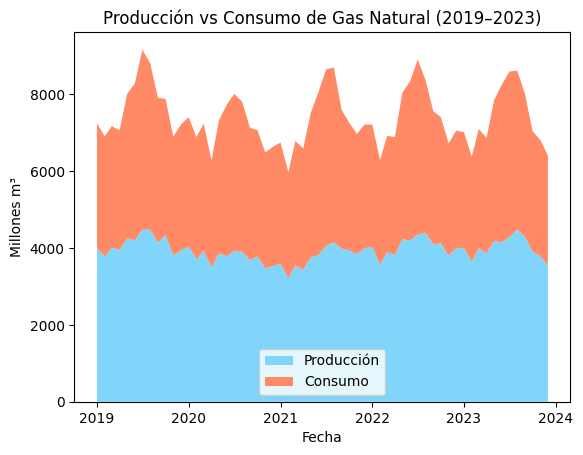

In [ ]:
"""Este gráfico permite visualizar si la producción nacional cubre el consumo total"""
df_temp = df_gas.groupby('indice_tiempo')[['produccion_gas_natural','total']].sum().reset_index()

plt.stackplot(df_temp['indice_tiempo'],
              df_temp['produccion_gas_natural'], df_temp['total'],
              labels=['Producción', 'Consumo'], colors=['#81d4fa','#ff8a65'])
plt.title('Producción vs Consumo de Gas Natural (2019–2023)')
plt.xlabel('Fecha')
plt.ylabel('Millones m³')
plt.legend()
plt.show()


/tmp/ipython-input-207090455.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


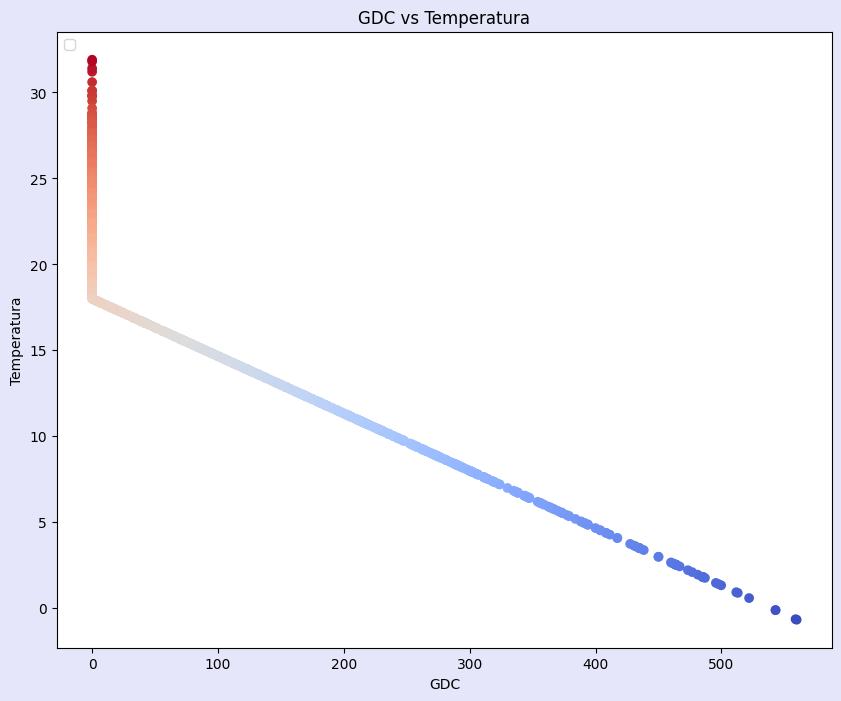

In [ ]:
#Serie temporal GDC vs Temperatura por provincia
plt.scatter(df_gas_long['gdc'], df_gas_long['temp'], c=df_gas_long['temp'], cmap='coolwarm')
plt.xlabel('GDC')
plt.ylabel('Temperatura')
plt.title('GDC vs Temperatura')
fig=plt.gcf()
fig.set_size_inches(10, 8)
fig.patch.set_facecolor('lavender')
plt.legend(loc='upper left')
plt.show()

/tmp/ipython-input-1084633566.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.heatmap(df_gas_long.groupby(['provincia', pd.Grouper(key='indice_tiempo', freq='M')])['temp'].mean().unstack(), cmap='coolwarm')


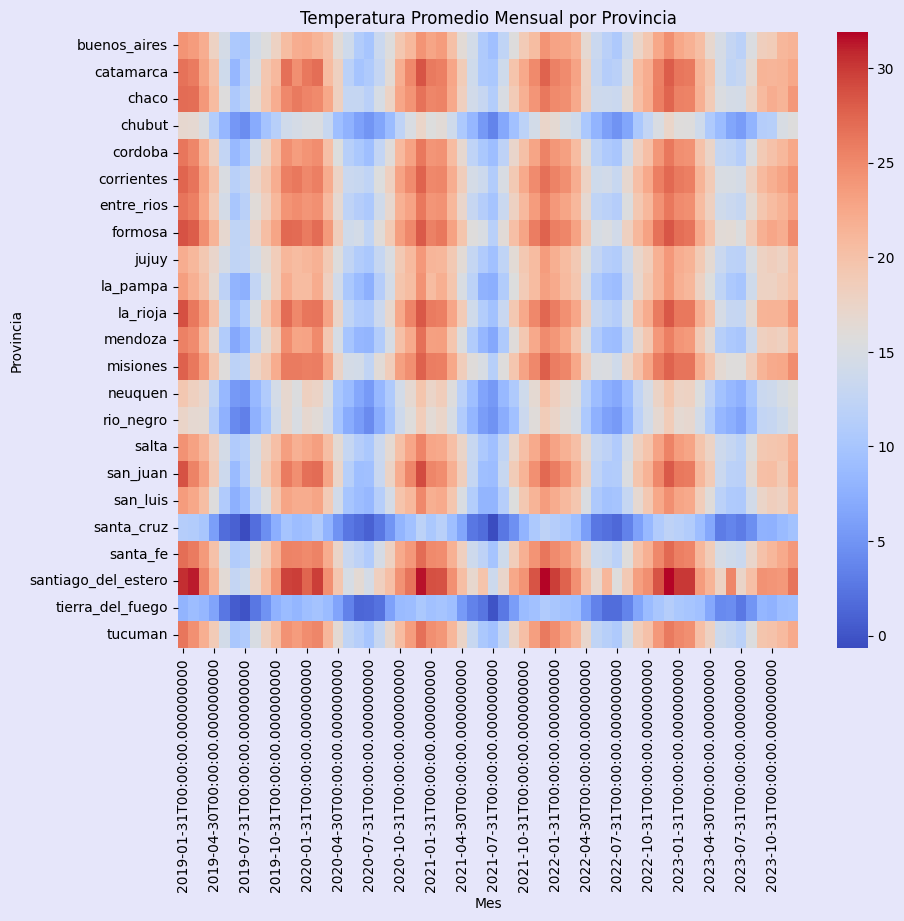

In [ ]:
#Heatmap mensual (Provincia VS Mes)
sns.heatmap(df_gas_long.groupby(['provincia', pd.Grouper(key='indice_tiempo', freq='M')])['temp'].mean().unstack(), cmap='coolwarm')
plt.xlabel('Mes')
plt.ylabel('Provincia')
plt.title('Temperatura Promedio Mensual por Provincia')
fig=plt.gcf()
fig.set_size_inches(10, 8)
fig.patch.set_facecolor('lavender')
plt.show()

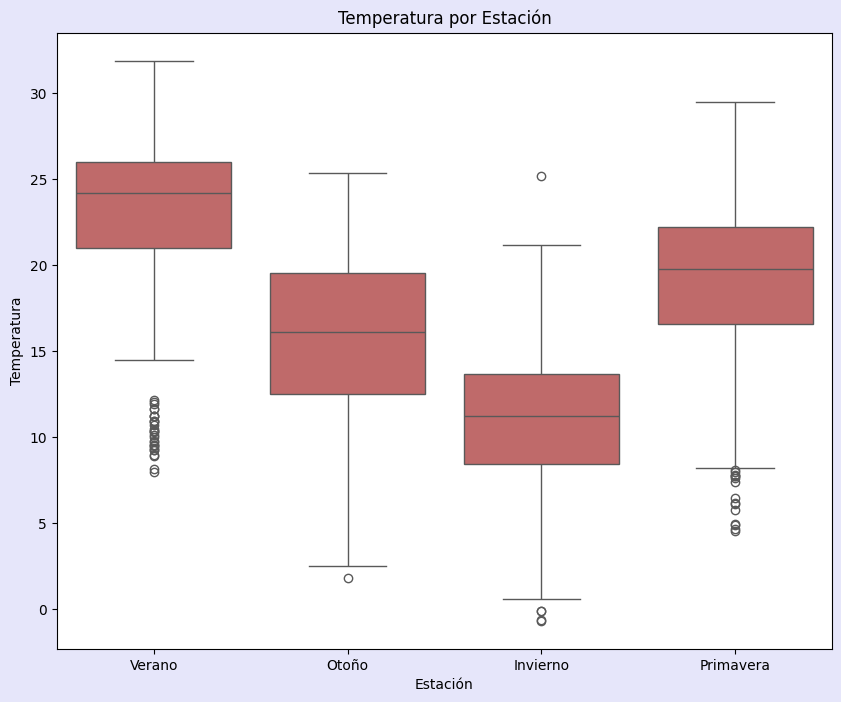

In [ ]:
#Boxplot por estación
sns.boxplot(x='estacion', y='temp', data=df_gas_long, color='indianred')
plt.xlabel('Estación')
plt.ylabel('Temperatura')
plt.title('Temperatura por Estación')
fig=plt.gcf()
fig.set_size_inches(10, 8)
fig.patch.set_facecolor('lavender')
plt.show()

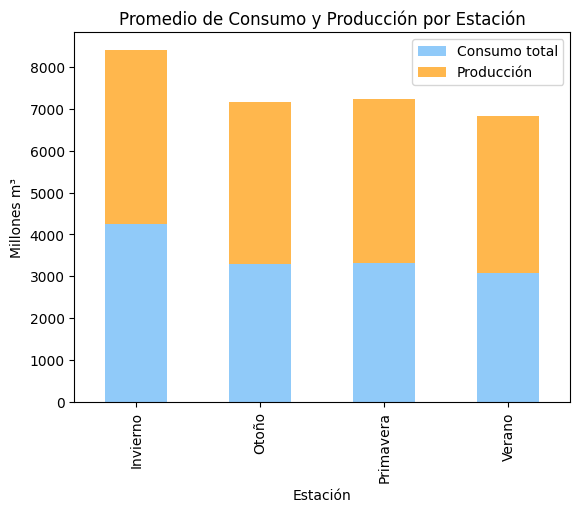

In [ ]:
df_bar = df_gas.groupby('estacion')[['total','produccion_gas_natural']].mean().reset_index()
df_bar.plot(kind='bar', x='estacion', stacked=True, color=['#90caf9','#ffb74d'])
plt.title('Promedio de Consumo y Producción por Estación')
plt.ylabel('Millones m³')
plt.xlabel('Estación')
plt.legend(['Consumo total','Producción'])
plt.show()

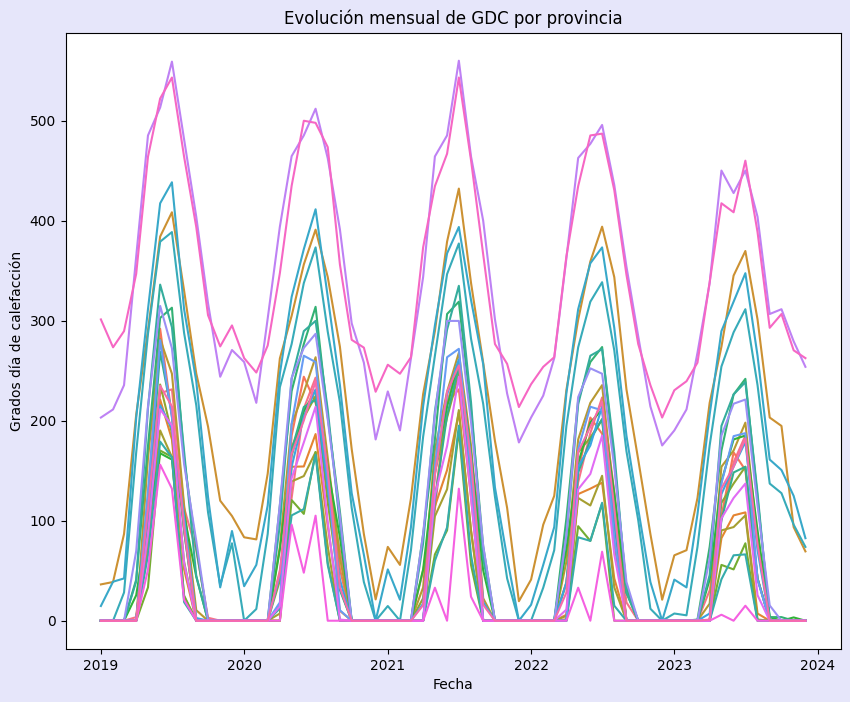

In [ ]:
sns.lineplot(data=df_gas_long, x='indice_tiempo', y='gdc', hue='provincia', legend=False)
plt.title('Evolución mensual de GDC por provincia')
plt.xlabel('Fecha')
plt.ylabel('Grados día de calefacción')
fig=plt.gcf()
fig.set_size_inches(10, 8)
fig.patch.set_facecolor('lavender')
plt.show()